In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tacoma as tc
import evaluation_networks as en
import contact_networks as cn
import util
from tacoma.analysis import plot_contact_durations

/home/scho_jj/.conda/envs/pandemic_networks_env/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from math import ceil, sqrt

In [11]:
C=44
Npps=24
C/ceil(sqrt(C/Npps))**2

11.0

5


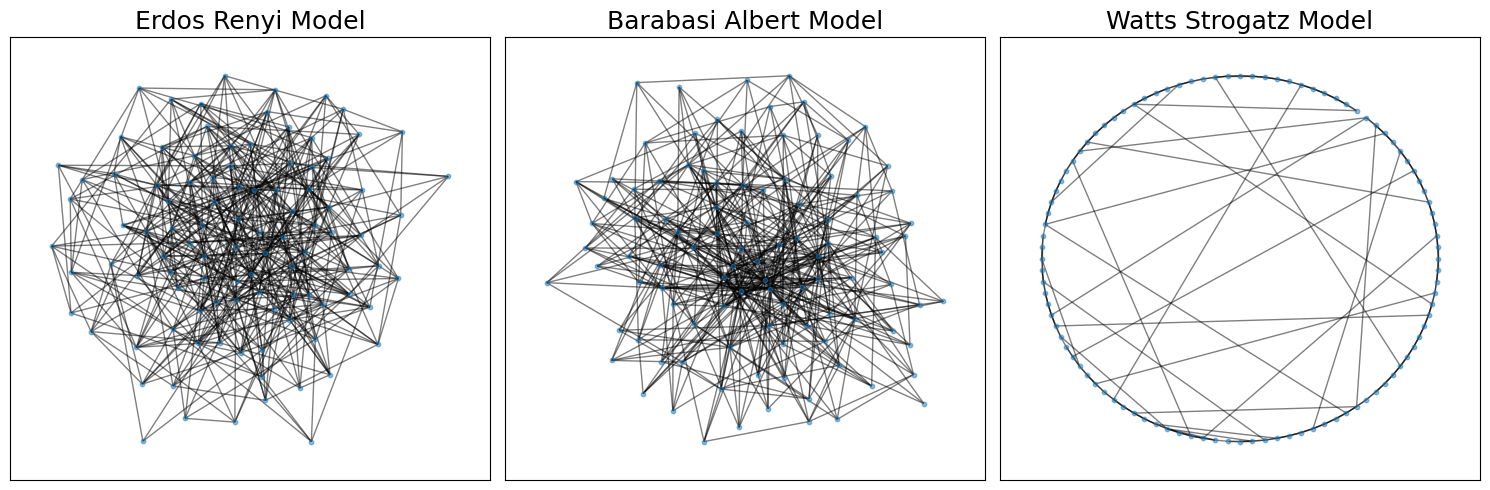

In [95]:
# Number of nodes and edges
num_nodes = 100
num_edges = 500

# Erdos Renyi Model
G_er = nx.erdos_renyi_graph(num_nodes, num_edges / (num_nodes * (num_nodes - 1) / 2))

# Barabasi Albert Model
G_ba = nx.barabasi_albert_graph(num_nodes, int(num_edges / num_nodes))

# Watts Strogatz Model
k = int(num_edges / num_nodes)  # Choose k such that average degree is half of num_edges / num_nodes
print(k)
p = 0.15  # Rewiring probability
G_ws = nx.watts_strogatz_graph(num_nodes, k, p)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, G, title in zip(axs.flatten(), [G_er, G_ba, G_ws], ['Erdos Renyi Model', 'Barabasi Albert Model', 'Watts Strogatz Model']):
    if title == 'Watts Strogatz Model':
        pos = nx.circular_layout(G)
    else:
        pos = nx.spring_layout(G)

    nx.draw_networkx(G, ax=ax, with_labels=False, node_size=10, alpha=.5, pos=pos)
    ax.set_title(title, fontsize=18)

plt.tight_layout()
plt.show()

{'contact': (array([  1.03474433,   1.10789643,   1.18622009,   1.2700809 ,
           1.35987032,   1.45600747,   1.55894113,   1.66915176,
           1.78715382,   1.91349814,   2.04877447,   2.19361427,
           2.34869365,   2.51473649,   2.69251786,   2.88286764,
           3.08667435,   3.30488934,   3.53853123,   3.78869062,
           4.05653523,   4.34331534,   4.65036961,   4.97913134,
           5.33113514,   5.70802415,   6.11155763,   6.54361925,
           7.00622582,   7.50153675,   8.03186409,   8.59968336,
           9.20764508,   9.85858716,  10.55554813,  11.30178133,
          12.10077011,  12.95624405,  13.87219643,  14.85290283,
          15.90294107,  17.02721263,  18.23096551,  19.51981868,
          20.8997884 ,  22.37731621,  23.95929908,  25.65312153,
          27.46669017,  29.40847053,  31.48752666,  33.71356339,
          36.09697162,  38.64887687,  41.38119116,  44.30666868,
          47.43896524,  50.79270211,  54.38353417,  58.22822307,
          62.3

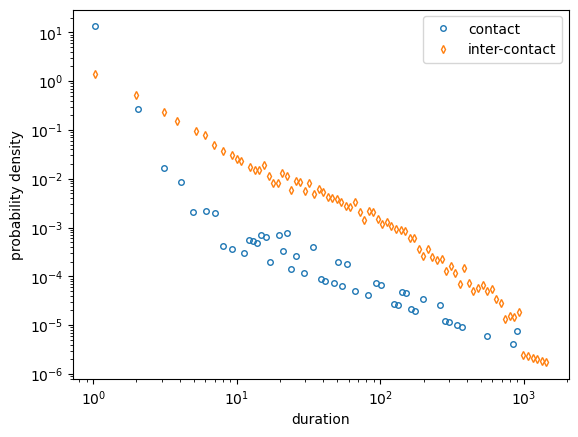

In [2]:
fig, ax = plt.subplots()
tn = tc.read_json_taco('STEPS_pareto_test.taco')
res = tc.api.measure_group_sizes_and_durations(tn)

plot_contact_durations(res, ax)

In [9]:
tn_emp = tc.read_json_taco('./networks/new_highschool/1_empirical_TU=1.taco')

4320 4319


In [6]:
from tacoma.interactive import visualize
visualize(tn, 1)

changing directory to /home/scho_jj/.tacoma/web
starting server here ... /home/scho_jj/.tacoma/web
preparing network 


127.0.0.1 - - [02/Apr/2024 20:00:24] "GET /?data=tmp_18e9ff82491 HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2024 20:00:25] "GET /tmp_18e9ff82491_config.json HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2024 20:00:25] "GET /tmp_18e9ff82491/tmp_18e9ff82491_0.taco HTTP/1.1" 200 -
127.0.0.1 - - [02/Apr/2024 20:00:25] "GET /tmp_18e9ff82491/tmp_18e9ff82491_0.json HTTP/1.1" 200 -


# Module for experiments with code snippets

In [2]:
# Simulation walkthrough for a single location
# Load data as a pandas DataFrame
df_base = pd.read_parquet('./VF_data/rns_data_2.parquet')[['p_id', 'activity_start_min', 'loc_id_end', 'activity_name_mct', 'activity_end_min']]
df_base = df_base.astype({'activity_start_min': 'uint32', 'activity_end_min': 'uint32'})
# Set simualtion time, for this example we simulate over the entire time range from the TAPAS data
t_start, t_end = df_base.activity_start_min.min(), df_base.activity_end_min.max()

# Select a location
# group by location and sort by size (number of visitors during simulated day)
locations = df_base.groupby('loc_id_end').size().sort_values(ascending=False).index.values
# Some example locations
loc1018 = df_base[df_base.loc_id_end == locations[1018]]
loc1003 = df_base[df_base.loc_id_end == locations[1003]]
loc1015 = df_base[df_base.loc_id_end == locations[1015]]
loc2101 = df_base[df_base.loc_id_end == locations[2101]]

# Start simulation
# Build Location
Loc = cn.Location(1015, 10, 10, 10, 10)
# Build simulation class
HN = cn.ContactNetwork(loc1018, Loc, t_start, t_end, n_scale=1)
# (optional) set paraemters of simulation class
HN.tlw_max_wt = 100

start


In [3]:
HN.make_movement('baseline')
tn_baseline = HN.make_tacoma_network(None, None)

edge changes errors:  0


In [4]:
# (optional) set paraemters of simulation class
HN.make_movement('random')
HN.p_add = .01
tn010 = HN.make_tacoma_network(None, None)

HN.p_add = .005
tn005 = HN.make_tacoma_network(None, None)

HN.p_add = .001
tn001 = HN.make_tacoma_network(None, None)

edge changes errors:  0
edge changes errors:  0
edge changes errors:  0


(0.0, 2500.0)

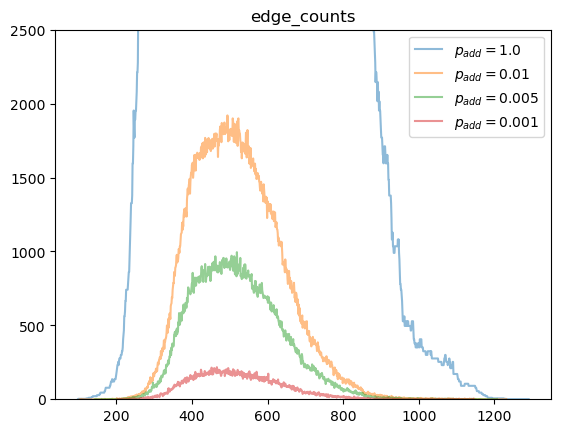

In [5]:
for tn, p_add in zip([tn_baseline, tn010, tn005, tn001], [1., .01, .005, .001]):
    _, _, m = tc.edge_counts(tn)
    plt.title('edge_counts')
    plt.plot(tn.t, m[:-1], alpha=.5, label=r'$p_{add}=$' + str(p_add))

plt.legend()
plt.ylim(0, 2_500)

{'contact': (array([ 1.02116923,  1.06486158,  1.11042338,  1.15793462,  1.2074787 ,
          1.2591426 ,  1.31301702,  1.36919655,  1.4277798 ,  1.48886964,
          1.5525733 ,  1.61900262,  1.68827423,  1.76050974,  1.83583595,
          1.91438512,  1.99629514,  2.08170981,  2.17077908,  2.26365933,
          2.3605136 ,  2.46151194,  2.56683165,  2.67665763,  2.7911827 ,
          2.9106079 ,  3.0351429 ,  3.16500633,  3.30042617,  3.44164016,
          3.58889622,  3.74245287,  3.90257968,  4.06955777,  4.24368029,
          4.42525292,  4.61459442,  4.8120372 ,  5.01792788,  5.23262792,
          5.45651425,  5.68997991,  5.93343477,  6.18730624,  6.45204   ,
          6.72810082,  7.01597334,  7.31616294,  7.62919664,  7.95562398,
          8.29601803,  8.65097639,  9.02112221,  9.4071053 ,  9.8096033 ,
         10.22932282, 10.6670007 , 11.12340533, 11.59933796, 12.09563413,
         12.61316512, 13.15283949, 13.7156047 , 14.30244871, 14.91440178,
         15.55253824, 16.21

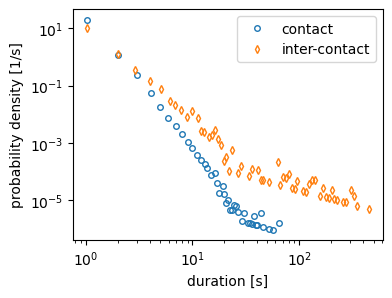

In [6]:
from tacoma.analysis import plot_contact_durations
result = tc.measure_group_sizes_and_durations(tn010)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plot_contact_durations(result, ax, time_unit='s', use_logarithmic_histogram=True)

#plt.hist(result.contact_durations, density=True, bins=range(0, 31))

In [7]:
# (optional) set paraemters of simulation class
HN.make_movement('clique')
tn_clique = HN.make_tacoma_network(None, None)

edge changes errors:  0


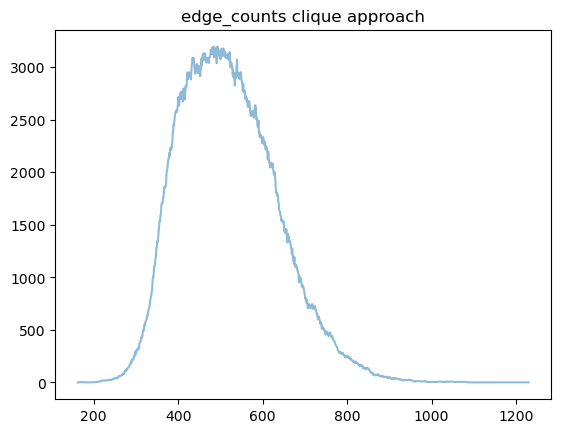

In [8]:
_, _, m = tc.edge_counts(tn_clique)
plt.title('edge_counts clique approach')
plt.plot(tn_clique.t, m[:-1], alpha=.5)


{'contact': (array([  1.03017336,   1.09327886,   1.16025002,   1.23132364,
           1.30675103,   1.38679889,   1.47175025,   1.56190549,
           1.65758339,   1.75912224,   1.86688107,   1.98124091,
           2.1026061 ,   2.23140578,   2.36809536,   2.51315816,
           2.6671071 ,   2.8304865 ,   3.00387407,   3.18788287,
           3.38316352,   3.59040651,   3.81034462,   4.04375551,
           4.2914645 ,   4.55434743,   4.83333382,   5.12941013,
           5.44362323,   5.77708413,   6.1309719 ,   6.50653783,
           6.90510987,   7.32809729,   7.77699572,   8.2533924 ,
           8.75897179,   9.29552153,   9.86493879,  10.46923693,
          11.11055266,  11.79115357,  12.51344616,  13.27998434,
          14.09347847,  14.95680495,  15.87301636,  16.84535227,
          17.87725072,  18.97236034,  20.13455327,  21.36793884,
          22.6768781 ,  24.06599927,  25.54021405,  27.10473505,
          28.76509416,  30.52716216,  32.39716944,  34.38172806,
          36.4

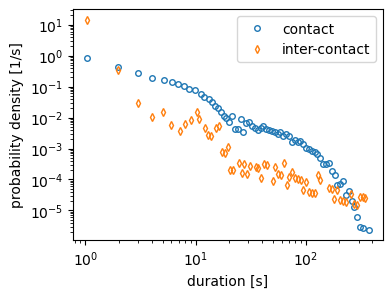

In [9]:
result = tc.measure_group_sizes_and_durations(tn_clique)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plot_contact_durations(result, ax, time_unit='s', use_logarithmic_histogram=True)

{'contact': (array([  1.03283489,   1.10177446,   1.1753156 ,   1.25376545,
           1.33745167,   1.42672378,   1.5219546 ,   1.62354189,
           1.73190991,   1.84751128,   1.97082879,   2.10237749,
           2.24270678,   2.39240277,   2.55209065,   2.72243736,
           2.90415436,   3.09800059,   3.30478564,   3.52537317,
           3.76068445,   4.01170227,   4.279475  ,   4.56512101,
           4.86983328,   5.19488447,   5.54163214,   5.91152449,
           6.30610638,   6.72702578,   7.17604068,   7.65502638,
           8.16598338,   8.71104568,   9.29248976,   9.91274401,
          10.57439893,  11.28021793,  12.03314888,  12.83633639,
          13.69313499,  14.6071231 ,  15.582118  ,  16.62219178,
          17.7316883 ,  18.9152414 ,  20.17779419,  21.52461973,
          22.96134306,  24.49396467,  26.12888557,  27.87293401,
          29.73339404,  31.71803588,  33.83514842,  36.09357378,
          38.50274431,  41.07272194,  43.8142402 ,  46.73874906,
          49.8

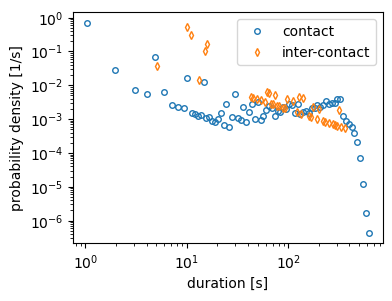

In [10]:
result = tc.measure_group_sizes_and_durations(tn_baseline)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plot_contact_durations(result, ax, time_unit='s', use_logarithmic_histogram=True)

In [ ]:
from tacoma.interactive import visualize
config={'network_plot_height': 500, 'plot_width': 500}
visualize(tn_baseline, frame_dt=1, config=config) 

# Evaluation experiments

In [13]:
df = pd.read_parquet('./data_eval_split/supermarked/f0_2021-03-17.parquet')
df = df[df.distance <= 200.]

In [14]:
EN = en.EvaluationNetwork('supermarked')
EN.df = df
EN.to_tacoma_tn()
EN.name_identifier

edge list errors:  0
edge changes errors:  0


'f4_2021-03-25'

In [ ]:
from tacoma.interactive import visualize

config={'network_plot_height': 500, 'plot_width': 500}
visualize(EN.tn, frame_dt=1, config=config) 

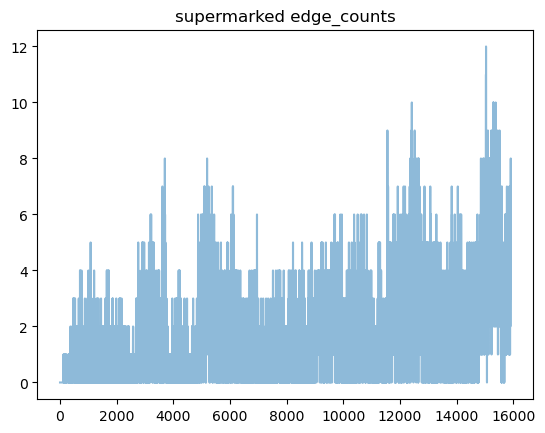

In [15]:
_, _, m = tc.edge_counts(EN.tn)
plt.title('supermarked edge_counts')
plt.plot(EN.tn.t, m[:-1], alpha=.5)

{'contact': (array([ 1.01793569,  1.0547779 ,  1.09295354,  1.13251088,  1.17349991,
          1.21597247,  1.25998224,  1.30558485,  1.35283797,  1.40180132,
          1.4525368 ,  1.50510856,  1.55958305,  1.61602913,  1.67451818,
          1.73512412,  1.79792358,  1.86299594,  1.93042347,  2.0002914 ,
          2.07268808,  2.14770501,  2.22543703,  2.30598241,  2.38944298,
          2.47592424,  2.56553552,  2.65839011,  2.75460539,  2.85430299,
          2.95760896,  3.06465389,  3.1755731 ,  3.29050682,  3.40960034,
          3.53300422,  3.66087446,  3.79337272,  3.9306665 ,  4.07292936,
          4.22034115,  4.37308822,  4.53136367,  4.69536761,  4.86530734,
          5.04139771,  5.22386134,  5.41292888,  5.60883936,  5.81184043,
          6.02218874,  6.24015019,  6.46600034,  6.7000247 ,  6.94251911,
          7.19379015,  7.45415544,  7.72394416,  8.00349736,  8.29316844,
          8.59332361,  8.90434231,  9.22661773,  9.56055729,  9.90658314,
         10.26513273, 10.63

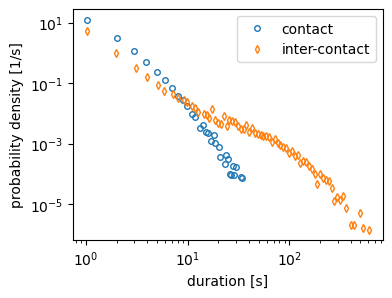

In [16]:
result = tc.measure_group_sizes_and_durations(EN.tn)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plot_contact_durations(result, ax, time_unit='s', use_logarithmic_histogram=True)